### Checking the XSPEC background output

This notebook is addressing the issue of folded vs. unfolded background spectra. 

In [1]:
# importing general packages

import numpy as np
import os, sys
import matplotlib.pyplot as plt

import xspec as xs
xs.Xset.allowPrompting = False #keeps pyxspec from hanging, waiting a response to a prompt
xs.Xset.allowNewAttributes = True

In [2]:
# What does the  unfolded spectrum look like from XSPEC? (Note that this is model dependent, but background is 
# well fit by power law, and the differences minimal + it still indicates the level on the order 
# of magnitude consideration)

xs.AllData.clear()
average = xs.Spectrum("bn121225417_LAT-LLE_bkgspectra.bak{1}")
average.response = "bn121225417_LAT-LLE_weightedrsp.rsp"

xs.AllModels.clear()
m=xs.Model("pow")
xs.Fit.perform()

xs.Plot.device="/xs"
xs.Plot.xAxis="MeV"
xs.Plot.add=True
xs.Plot.background=True
xs.Plot.xLog=True
xs.Plot.yLog=True
xs.Plot.show()
xs.Plot("ufspec") # this is unfolded spectrum

x_average_uf= xs.Plot.x(1)
y_average_uf = xs.Plot.y(1)
xErrs_average_uf = xs.Plot.xErr(1)
yErrs_average_uf = xs.Plot.yErr(1)


User entered plot commands:


In [3]:
xs.Plot.device="/xs"
xs.Plot.xAxis="MeV"
xs.Plot.add=True
xs.Plot.background=True
xs.Plot.xLog=True
xs.Plot.yLog=True
xs.Plot.show()
xs.Plot("data") # this is folded spectrum 

x_average= xs.Plot.x(1)
y_average = xs.Plot.y(1)
xErrs_average = xs.Plot.xErr(1)
yErrs_average = xs.Plot.yErr(1)


User entered plot commands:


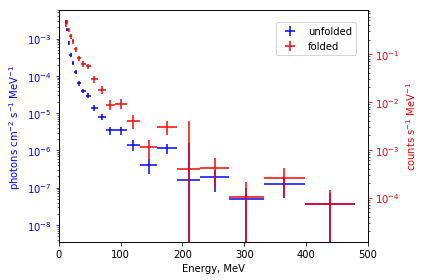

In [4]:
fig, ax1 = plt.subplots()
ax1.errorbar(x_average_uf, y_average_uf, xerr = xErrs_average_uf, yerr = yErrs_average_uf, ls='none', color='b', label='unfolded')
ax1.set_xlabel('Energy, MeV')
ax1.set_ylabel('photons cm$^{-2}$ s$^{-1}$ MeV$^{-1}$ ', color='b')
ax1.tick_params('y', colors='b')
ax1.set_yscale('log')


ax2 = ax1.twinx()
ax2.errorbar(x_average, y_average, xerr = xErrs_average, yerr = yErrs_average, ls='none', color='r', label='folded')
ax2.set_ylabel('counts s$^{-1}$ MeV$^{-1}$', color='r')
ax2.tick_params('y', colors='r')
ax2.set_yscale('log')

plt.xlim(0, 5e2)
fig.legend(loc=(0.65,0.8))
fig.tight_layout()
#plt.savefig('old_new_bkg.pdf')
plt.show()

